In [2]:
suppressPackageStartupMessages({
    library(data.table)
    library(dplyr)
    library(glue)
    library(ggplot2)
    library(sf)
    library(patchwork)
    library(ggthemes)
    library(purrr)
    library(Matrix)
    library(tidyr)
    library(Seurat)
})
fig.size <- function(h, w) {
    options(repr.plot.height = h, repr.plot.width = w)
}


In [3]:
dmt1 <- readRDS('../data/dmt1.rds')
aggs1 <- readRDS('../data/aggs1.rds')
genes = read.table('../data/VizgenLungHacohen/cells/genes.txt', header=FALSE)

In [5]:
# Do subsetting for the count_matrix and metadata from here 
# TODO: other immune cells -> do I see structures for immune cells? 
indices = which(dmt1$pts$type_lvl1!='Epithelial')

In [9]:
# Do subsetting for the count_matrix and metadata from here 
# TODO: other immune cells -> do I see structures for immune cells? 
indices = which(dmt1$pts$type_lvl1!='Epithelial')
meta = dmt1$pts[indices, ]
counts = dmt1$counts[,indices]
rownames(counts) = genes$V1 
meta$counts = colSums(counts)
head(meta)
seurat_object <- CreateSeuratObject(counts=counts, meta.data=meta)
seurat_object <- NormalizeData(seurat_object, normalization.method='LogNormalize', 
                              scale.factor = median(colSums(counts)))
seurat_object <- FindVariableFeatures(seurat_object)
seurat_object <- ScaleData(seurat_object)
seurat_object <- RunPCA(seurat_object, npcs=10)

X,Y,ORIG_ID,type_lvl1,type_lvl2,hubID,f,agg_id,spatial_cluster,counts
<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>,<dbl>
7099.507,68.97765,16,Myeloid,MARCO+ Macrophage,H260,1.5692556,2,0,59
7088.350,24.30018,19,Myeloid,MARCO+ Macrophage,H260,1.6494354,3832,1,20
7086.518,-39.93548,31,Fibroblast,Fibroblast,H260,1.8392102,1,13,19
7104.265,166.66700,52,Plasma,Plasma,H260,0.6968454,6,1,19
7095.904,205.53981,61,Vascular,Vascular,H260,0.7750772,4,13,24
7107.079,226.44103,64,Myeloid,MARCO+ Macrophage,H260,1.5910236,4,13,25


Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  Feature113, Feature112, Feature469, Feature347, Feature335, Feature428, Feature6, Feature332, Feature333, Feature376 
	   Feature279, Feature387, Feature149, Feature415, Feature179, Feature327, Feature282, Feature398, Feature397, Feature196 
	   Feature166, Feature275, Feature330, Feature468, Feature385, Feature236, Feature270, Feature130, Feature313, Feature82 
Negative:  Feature93, Feature74, Feature40, Feature212, Feature38, Feature39, Feature316, Feature303, Feature305, Feature413 
	   Feature13, Feature208, Feature116, Feature396, Feature300, Feature117, Feature199, Feature205, Feature354, Feature73 
	   Feature320, Feature19, Feature17, Feature213, Feature220, Feature328, Feature255, Feature184, Feature272, Feature370 
PC_ 2 
Positive:  Feature144, Feature263, Feature79, Feature453, Featur

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



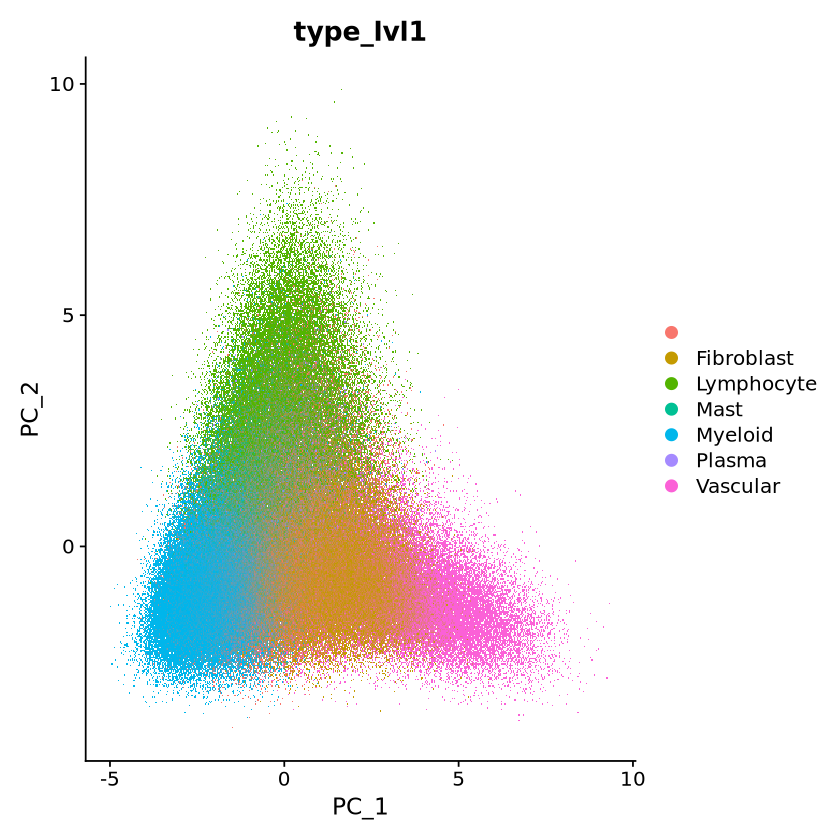

In [10]:
DimPlot(seurat_object, reduction = "pca", group.by = 'type_lvl1') 


In [40]:
# CreateSeuratObject may mess thing up? -> meta.data and 
epi_counts = dmt1$counts[,indices]
rownames(epi_counts) = genes$V1 
seurat_object <- CreateSeuratObject(counts=epi_counts, meta.data=meta)


Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [44]:
median(seurat_object@meta.data$nCount_RNA)
seurat_object <- NormalizeData(seurat_object, normalization.method='LogNormalize', 
                              scale.factor = median(colSums(epi_counts)))


[1] 36

In [ ]:
seurat_object <- NormalizeData(seurat_object, normalization.method='LogNormalize', 
                              scale.factor = median(colSums(epi_counts)))
seurat_object <- FindVariableFeatures(seurat_object)
seurat_object <- ScaleData(seurat_object)

In [45]:
# CreateSeuratObject may mess thing up? -> meta.data and 
counts = dmt1$counts
rownames(counts) = genes$V1 
seurat_object <- CreateSeuratObject(counts=counts, meta.data=dmt1$pts)
seurat_object <- NormalizeData(seurat_object, normalization.method='LogNormalize', 
                              scale.factor = median(colSums(counts)))
seurat_object <- FindVariableFeatures(seurat_object)
seurat_object <- ScaleData(seurat_object)

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [46]:
seurat_object <- RunPCA(seurat_object, npcs=10)

PC_ 1 
Positive:  Feature112, Feature113, Feature74, Feature347, Feature6, Feature398, Feature282, Feature303, Feature263, Feature355 
	   Feature144, Feature464, Feature428, Feature38, Feature316, Feature258, Feature40, Feature349, Feature469, Feature88 
	   Feature79, Feature468, Feature453, Feature39, Feature385, Feature59, Feature313, Feature435, Feature335, Feature140 
Negative:  Feature17, Feature307, Feature301, Feature155, Feature150, Feature156, Feature62, Feature289, Feature396, Feature407 
	   Feature164, Feature291, Feature102, Feature470, Feature441, Feature377, Feature153, Feature465, Feature163, Feature287 
	   Feature125, Feature168, Feature354, Feature210, Feature341, Feature219, Feature230, Feature277, Feature337, Feature25 
PC_ 2 
Positive:  Feature113, Feature112, Feature469, Feature347, Feature335, Feature428, Feature6, Feature333, Feature376, Feature387 
	   Feature332, Feature149, Feature279, Feature415, Feature179, Feature327, Feature398, Feature397, Feature282,

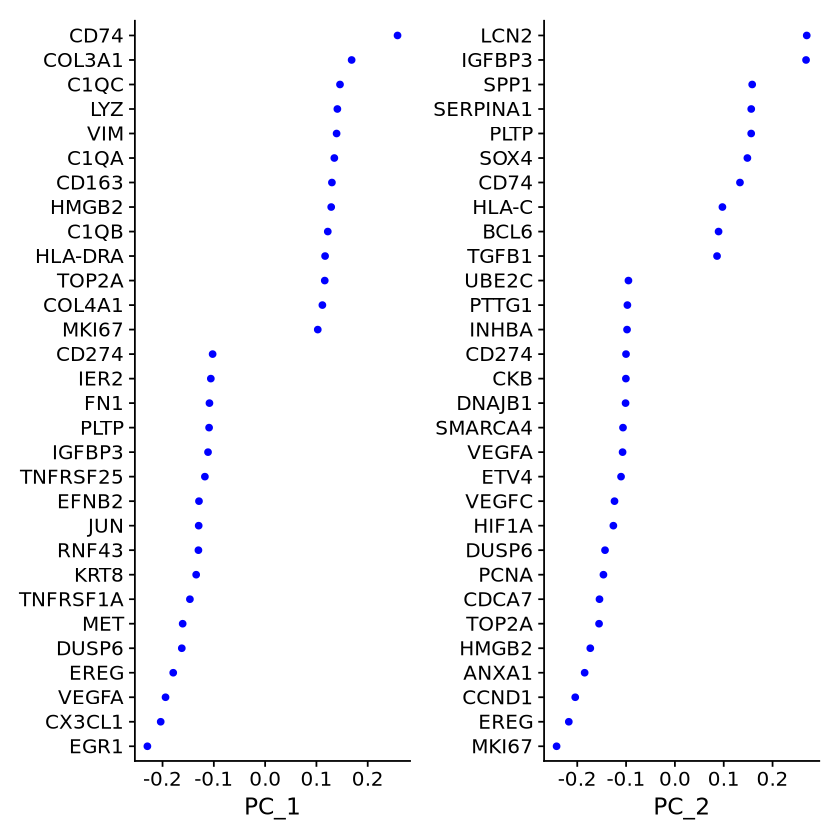

In [16]:
# Check some PCs
VizDimLoadings(seurat_object, dims = 1:2, reduction = "pca")


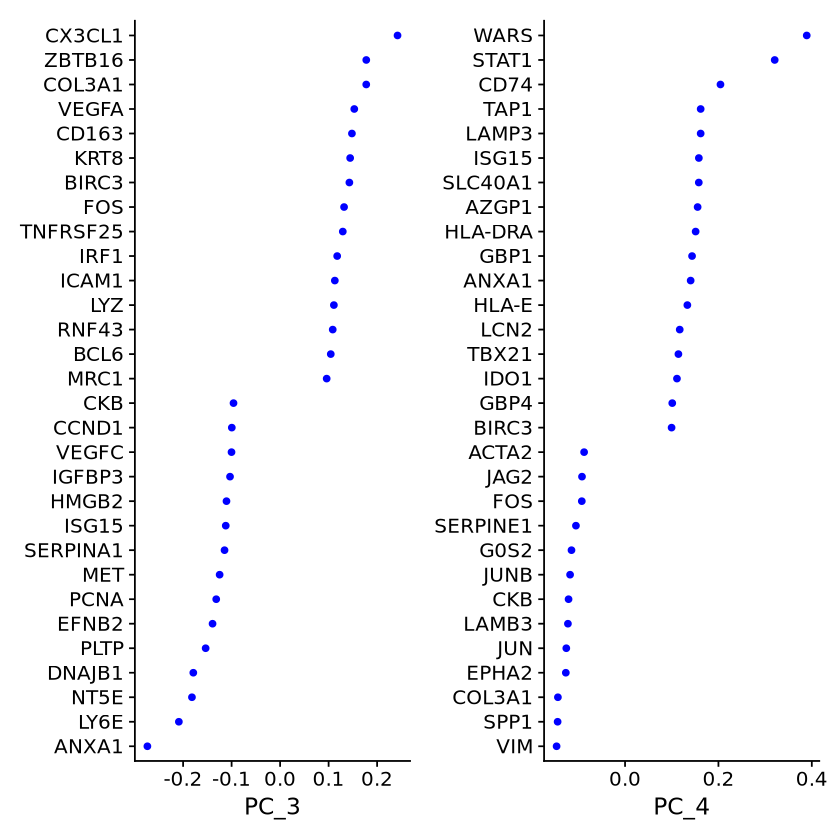

In [17]:
VizDimLoadings(seurat_object, dims = 3:4, reduction = "pca")


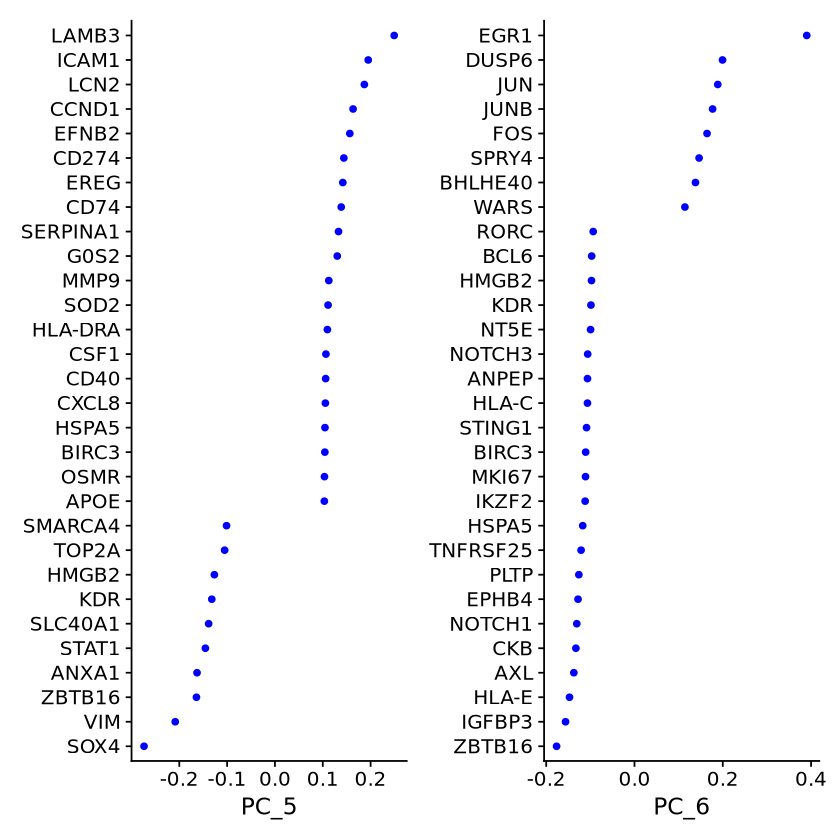

In [19]:
VizDimLoadings(seurat_object, dims = 5:6, reduction = "pca")


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



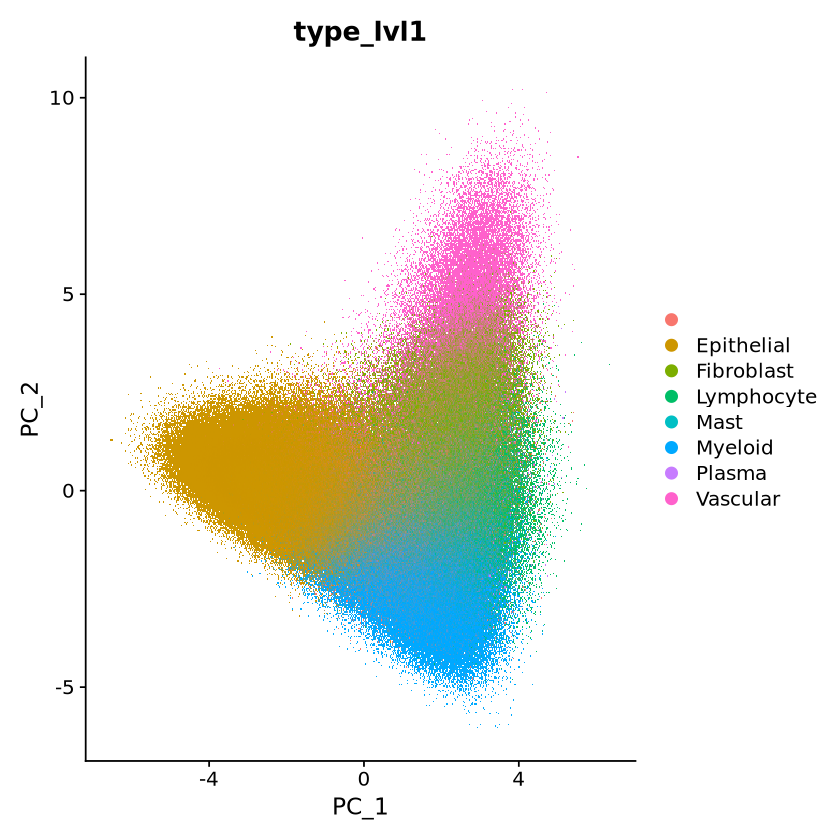

In [49]:
DimPlot(seurat_object, reduction = "pca", group.by = 'type_lvl1') 


In [50]:
seurat_object_epi <- CreateSeuratObject(counts=epi_counts, meta.data=meta)
seurat_object_epi <- NormalizeData(seurat_object_epi, normalization.method='LogNormalize', 
                              scale.factor = median(colSums(epi_counts)))
seurat_object_epi <- FindVariableFeatures(seurat_object_epi)
seurat_object_epi <- ScaleData(seurat_object_epi)

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [ ]:
# What are the variable genes?
seurat_object_epi@assays

In [32]:
# UMAP/PCA on all cells -> where are the epi cells in those PCA space?
# Graph-based clustering
str(seurat_object)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay5' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ layers    :List of 3
  .. .. .. .. ..$ counts    :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:8611162] 10 16 24 39 51 92 101 121 152 154 ...
  .. .. .. .. .. .. ..@ p       : int [1:300734] 0 23 35 55 71 93 111 127 159 195 ...
  .. .. .. .. .. .. ..@ Dim     : int [1:2] 479 300733
  .. .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. .. ..$ : NULL
  .. .. .. .. .. .. ..@ x       : num [1:8611162] 1 2 1 1 1 2 2 1 1 2 ...
  .. .. .. .. .. .. ..@ factors : list()
  .. .. .. .. ..$ data      :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. .. ..@ i       : int [1:8611162] 10 16 24 39 51 92 101 121 152 154 ...
  .. .. .. .. .. .. ..@ p       : int [1:300734] 0 23 35 55 71 93 111 127 159 195 ...


Warning message in ElbowPlot(seurat_object):
“The object only has information for 10 reductions”


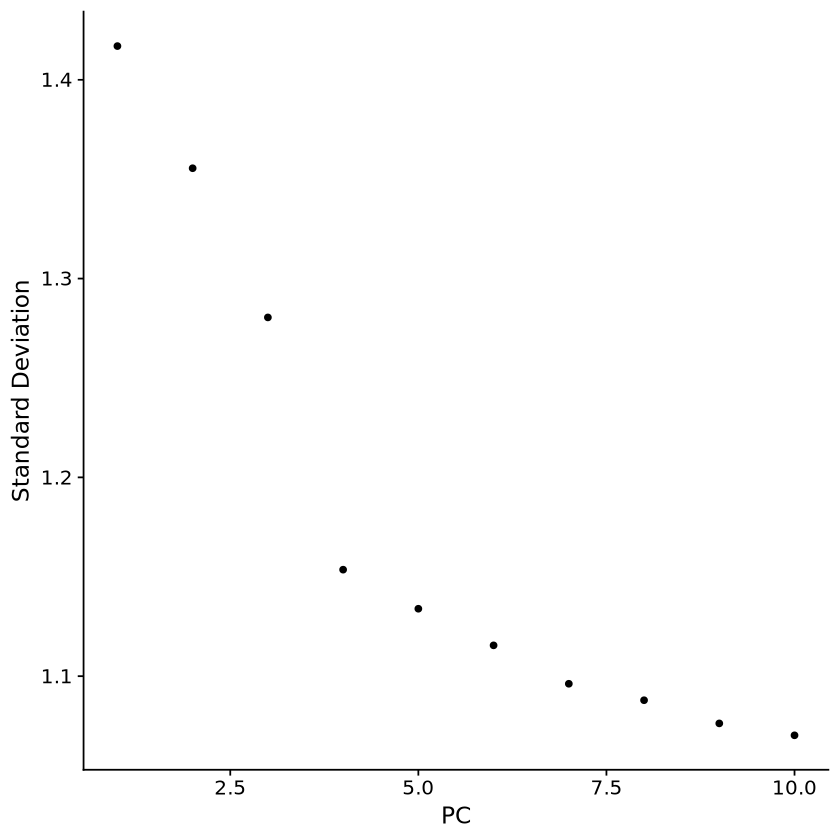

In [21]:
ElbowPlot(seurat_object)

In [28]:
seurat_object <- RunUMAP(seurat_object, dims=1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:03:08 UMAP embedding parameters a = 0.9922 b = 1.112

15:03:08 Read 300733 rows and found 10 numeric columns

15:03:08 Using Annoy for neighbor search, n_neighbors = 30

15:03:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:03:58 Writing NN index file to temp file /local/scratch/42667125.1.interactive/RtmpwbsLHJ/file3803231a2f73

15:03:58 Searching Annoy index using 1 thread, search_k = 3000

15:08:49 Annoy recall = 100%

15:08:49 Commencing smooth kNN distance calibration using 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



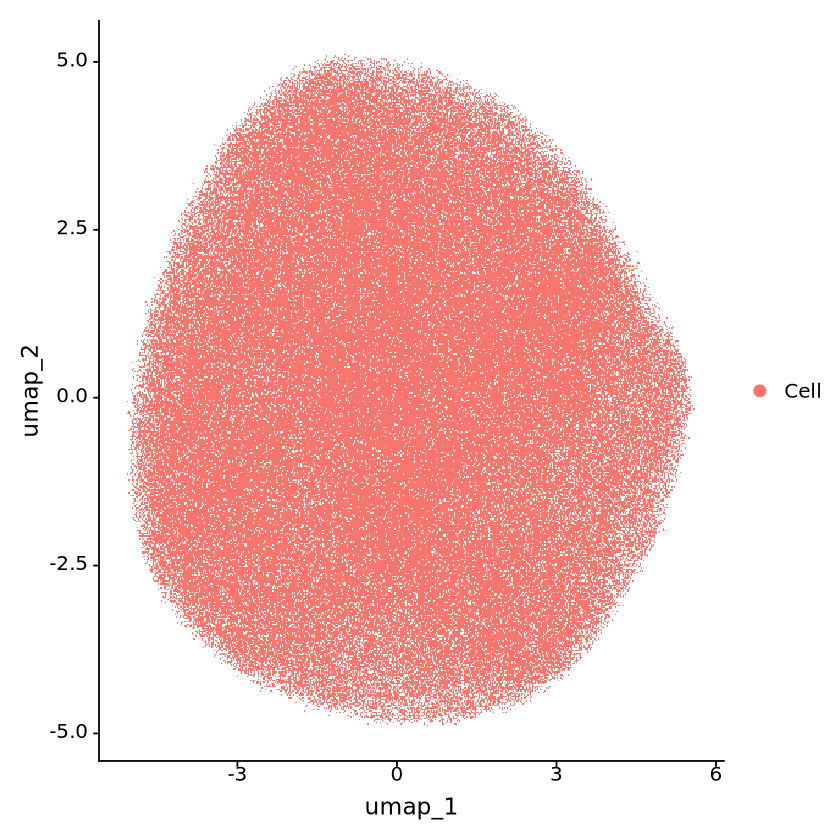

In [29]:
DimPlot(seurat_object, reduction = "umap")

In [ ]:
seurat_object <- Seurat::FindNeighbors(seurat_object, dims=1:5)
seurat_object <- Seurat::FindCluster(seurat_object, resolution=1)

In [30]:
dmt1$pts[dmt1$pts$type_lvl1=='Epithelial', ]

X,Y,ORIG_ID,type_lvl1,type_lvl2,hubID,f,agg_id,spatial_cluster
<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<fct>
7086.414,79.414863586,1,Epithelial,Epithelial,H260,1.1896149,2,0
7087.515,-21.805605888,3,Epithelial,Epithelial,H260,1.0746909,1,13
7099.331,-17.703966141,4,Epithelial,Epithelial,H260,2.3223990,1,13
7100.477,-9.060024023,5,Epithelial,Epithelial,H260,1.2363504,1,13
7093.215,-5.783357859,6,Epithelial,Epithelial,H260,1.4256928,1,13
7086.925,-4.925822675,7,Epithelial,Epithelial,H260,1.4209250,3832,1
7093.836,4.836622715,8,Epithelial,Epithelial,H260,1.6776540,3832,1
7091.700,13.036805630,9,Epithelial,Epithelial,H260,1.3082215,3832,1
7099.888,27.607007980,10,Epithelial,Epithelial,H260,1.7632712,3832,1
